In [1]:
### Make notebook wider:

from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

import scipy.io
import os, importlib
import matplotlib.pyplot as plt
import statistics
import scipy.stats
import numpy as np
import pandas as pd
from ast import literal_eval
import pickle
import matplotlib.patches as mpatches
import glob
import seaborn as sns; 
import ptitprince as pt

dark_pink = '#BE575F'
dark_blue = '#232C56'

ImportError: cannot import name 'categorical_order' from 'seaborn._core' (C:\Users\Emmett\anaconda3\lib\site-packages\seaborn\_core\__init__.py)

In [207]:
## this is all plotted from data folder in fig one 
## neaten this up
## maybe turn all the data that is used into a dataframe that can be pulled from 

In [208]:
def conactinate_nth_items(startlist):
    concatinated_column_vectors = []
    for c in range(len(max(startlist, key=len))):
        column = []
        for t in range(len(startlist)):
            if c <= len(startlist[t])-1:
                column = column + [startlist[t][c]]
        concatinated_column_vectors.append(column)
    return concatinated_column_vectors

def convolve_movmean(y,N):
    y_padded = np.pad(y, (N//2, N-1-N//2), mode='edge')
    y_smooth = np.convolve(y_padded, np.ones((N,))/N, mode='valid') 
    return y_smooth

def mean_learning_curve(AA_PerfectScores):

    TrialbyTrial_Pscores = conactinate_nth_items(AA_T_levels)
    MeanLearningCurve = []
    for i,item in enumerate(TrialbyTrial_Pscores):
        MeanLearningCurve = MeanLearningCurve + [np.mean(item)]

    return MeanLearningCurve

def standard_dev_across_trials(AA_TrainingLevels):

    TrialbyTrial_tlevels = conactinate_nth_items(AA_TrainingLevels)

    standard_dev_bytrial = []
    for trial in TrialbyTrial_tlevels:
        standard_dev_bytrial = standard_dev_bytrial + [np.std(trial)]

    return standard_dev_bytrial


def SaveFig(file_name,figure_dir):
    if not os.path.isdir(figure_dir):
        os.makedirs(figure_dir)
    plt.savefig(figure_dir + file_name, bbox_inches='tight')
    plt.close()
    
def CreateSequences_Time(Transition_types,Transition_times,transition_reference_time,Transition_filter_time):
    # reoder transitions into time releveant sequences  
    seq_index = 0
    TimeFiltered_ids = [[]]
    TimeFiltered_times = [[]]
    Reference_times = [[]]

    for ind, transit in enumerate (Transition_types):
        if Transition_times[ind] < Transition_filter_time and Transition_times[ind] > 0.03: # if less than filter time and more than lower bound filter time (0.05s):
            TimeFiltered_ids[seq_index] = TimeFiltered_ids[seq_index] + [transit]
            TimeFiltered_times[seq_index] = TimeFiltered_times[seq_index] + [Transition_times[ind]]
            Reference_times[seq_index] = Reference_times[seq_index] + [transition_reference_time[ind]]
            

        else:
            if TimeFiltered_ids[seq_index]: # if not empty 
                seq_index = seq_index + 1
                TimeFiltered_ids = TimeFiltered_ids + [[]]
                TimeFiltered_times = TimeFiltered_times +[[]] 
                Reference_times = Reference_times + [[]]
                TimeFiltered_ids[seq_index] = TimeFiltered_ids[seq_index] + [transit]
                TimeFiltered_times[seq_index] = TimeFiltered_times[seq_index] + [Transition_times[ind]]   
                Reference_times[seq_index] = Reference_times[seq_index] + [transition_reference_time[ind]]
    return TimeFiltered_ids,TimeFiltered_times,Reference_times


def determime_heatmapdata(var,port1,port2,port3,port4):
    TransitionTypesIndex = np.array([11,12,13,14,15,16,17,18,21,22,23,24,25,26,27,28,31,32,33,34,35,36,37,38,41,42,43,44,45,46,47,48,51,52,53,54,55,56,57,58,61,62,63,64,65,66,67,68,71,72,73,74,75,76,77,78,81,82,83,84,85,86,87,88])
    port1_transits = []
    for i in range(((port1*8)-8),((port1*8)-8)+8):
        port1_transits = port1_transits + [var[i]]

    port2_transits = []
    for i in range(((port2*8)-8),((port2*8)-8)+8):
        port2_transits = port2_transits + [var[i]]

    port3_transits = []
    for i in range(((port3*8)-8),((port3*8)-8)+8):
        port3_transits = port3_transits + [var[i]]

    port4_transits = []
    for i in range(((port4*8)-8),((port4*8)-8)+8):
        port4_transits = port4_transits + [var[i]]

    port_transits = [port1_transits] + [port2_transits] + [port3_transits] + [port4_transits]

    return port_transits

def determineTransitionNumber(TimeFiltered_seqs):
    TransitionTypesIndex = np.array([11,12,13,14,15,16,17,18,21,22,23,24,25,26,27,28,31,32,33,34,35,36,37,38,41,42,43,44,45,46,47,48,51,52,53,54,55,56,57,58,61,62,63,64,65,66,67,68,71,72,73,74,75,76,77,78,81,82,83,84,85,86,87,88])
    trajects = []
    for inds, seqs in enumerate(TimeFiltered_seqs):
#         seqs = literal_eval(seqs) # convert back from weird df string conversion thing
        for ind, transits in enumerate(seqs):
#             if not str(transits)[0] == str(transits)[1]:
            trajects = np.append(trajects,transits)
    transition_number = []
    for transit_types in TransitionTypesIndex:
        temp = (np.where(trajects == float(transit_types)))
        transition_number.append(len(temp[0]))
    return transition_number

def reversedata(port_transits):

    reordered_port_transits = []
    for i in range(1,len(port_transits)+1):
        mylist = port_transits[-i]
        myorder = new_order
        mylist = [mylist[i] for i in myorder]
        newlist = []
        for item in mylist:
            newlist = newlist + [float(item)]
        reordered_port_transits = reordered_port_transits + [newlist]
    #restructure data to swap x and y axis:
    data = [[],[],[],[],[],[],[],[]]
    for ind in range(8):
        for index,item in enumerate(reordered_port_transits):
            data[ind] = data[ind] + [item[len(item)-1-ind]]
    for i in range(8):
        data[i].reverse()
    return data

def conactinate_nth_items(startlist):
    concatinated_column_vectors = []
    for c in range(len(max(startlist, key=len))):
        column = []
        for t in range(len(startlist)):
            if c <= len(startlist[t])-1:
                column = column + [startlist[t][c]]
        concatinated_column_vectors.append(column)
    return concatinated_column_vectors

def SaveFig(file_name,figure_dir):
    if not os.path.isdir(figure_dir):
        os.makedirs(figure_dir)
    plt.savefig(figure_dir + file_name,bbox_inches=0,transparent = True)
    plt.close()
    
def port_fitted_poke_times(Fitted_tfiltered_seqs,Fitted_tfiltered_times,port,max_filter):
    PortPokes = [[],[],[],[],[],[],[],[]]
    for index, seq in enumerate(Fitted_tfiltered_seqs):
        seq = literal_eval(seq) 
        if np.size(seq) > 0:
            if int(str(seq[0])[0]) == port: # if sequence starts with port
                if not int(str(seq[0])[1]) == port: #ignore self pokes 
                    current_seq_time = 0
                    for ind,item in enumerate(seq):
                        if ind > max_filter: # ignore long chains of seqs that dont return to the start port as they skew data towards being super long..
                            break
                        c_port = int(str(item)[-1])-1
                        PortPokes[c_port] = PortPokes[c_port] +[current_seq_time + literal_eval(Fitted_tfiltered_times[index])[ind]]
                        current_seq_time = current_seq_time + literal_eval(Fitted_tfiltered_times[index])[ind]
    return PortPokes

def create_plotting_df(portpokes,new_order):
    concatinated = []
    ids = []
    for index, port in enumerate(new_order):
        concatinated = concatinated + portpokes[port] 
        if index < 5:
            ids = ids +  (len(portpokes[port]) * [index])
        else:
            ids = ids +  (len(portpokes[port]) * [5])
            
    df = pd.DataFrame({'index' : ids, 
                       'Time':concatinated})
    return(df)

def Find_Transition_times_sns(TransitionLatency_Tfilt,TransitionTypes_Tfilt,Transitions):
    transit_times = []
    transit_type = []
    for i,Transits in enumerate(Transitions):
        transit_times_temp = []
        for ind, transition_pair in enumerate(TransitionTypes_Tfilt):
            if transition_pair == Transits:
                transit_times_temp = transit_times_temp + [TransitionLatency_Tfilt[ind]]
                
        transit_times = transit_times + transit_times_temp
        transit_type = transit_type + len(transit_times_temp)*[i+1]
    return(transit_times,transit_type)

In [209]:
### load in all data and create df:


PATH = r'Z:\projects\Emmett\Documents\writeup\fig1_behaviour_figures\data\*\\'
paths = glob.glob(PATH + '\AcrossSessions\AnalysisOutput\\')

AA_T_levels = []
AA_trials_per_session= []
for path in paths:
    with open (path + 'Training_levels' , 'rb') as fp:
        T_levels = pickle.load(fp)        
        AA_T_levels = AA_T_levels + [T_levels]
    with open (path + 'TrialsPerSessions' , 'rb') as fp:
        trials_per_session = pickle.load(fp)        
        AA_trials_per_session = AA_trials_per_session + [trials_per_session]
        
animals= []
for path in paths:
    animals = animals + [path.split('\\')[7]]

data = pd.DataFrame({'animal':animals, 'training_level_by_trial':AA_T_levels, 'trials_per_session':AA_trials_per_session})


paths = glob.glob(PATH + '\Preprocessed\\')
AA_Port_transits = []
AA_Time_filter = []
AA_TransitionTypes_unfilt = []
AA_TransitionLatency_unfilt = []
AA_Start_Poke_out_time = []
AA_trial_id = []
AA_session_str = []


port1 = 2
port2 = 1
port3 = 6
port4 = 3
port5 = 7

for index,item in enumerate(data.trials_per_session):
    np.cumsum(item)

    # pull out info to find when trials 4000:5000 occured
    s = 4000
    e = 4500
    
    cum_sum = np.cumsum(item)
    first_session = np.where(cum_sum<s)[0][-1]
    last_session = np.where(cum_sum>e)[0][0]
    start_remainder = s - cum_sum[first_session]
    end_remainder = cum_sum[last_session] - e

    sessions = os.listdir(paths[index])[first_session+1:last_session+1]

    # load in data for each 
    # this script pulls in data for each session, trims down the start and end to get the 1000 trials and then runs my filtering function to put them into time relevant sequences

    count = 0
    
    Time_filter = []
    TransitionTypes_unfilt = []
    TransitionLatency_unfilt = []
    Start_Poke_out_time = []
    trial_id = []
    session_str = []
    
    ## if only 1 session contains 4000:5000 trials
    if len(sessions) == 1:
        # maks both start abd enbd if only 1 session contains 4000:5000 trials
        data_ = pd.read_csv(paths[index] + sessions[0] + '\\PreProcessed_TransitionData.csv')
        a = data_.Trial_id.values >= start_remainder 
        b = data_.Trial_id.values <= data_.Trial_id.values[-1] - end_remainder 
        
        mask = a * b
        count = count + len(data_[mask].Trial_id.unique())
        Start_Poke_out_time = Start_Poke_out_time + list(data_[mask].Start_Poke_out_time.values)
        Time_filter = Time_filter + list(data_[mask].loc[:,'2s_Time_Filter_out_in'])
        TransitionTypes_unfilt = TransitionTypes_unfilt + list(data_[mask].loc[:,'Transition_type'])
        TransitionLatency_unfilt = TransitionLatency_unfilt + list(data_[mask].loc[:,'out_in_Latency'])
        trial_id = trial_id + list(data_[mask].Trial_id.values)
        session_str = session_str + [session.split('_')[0]]* len( data_[mask].Trial_id.values)
    else:
        for ind,session in enumerate(sessions):
            data_ = pd.read_csv(paths[index] + session + '\\PreProcessed_TransitionData.csv')
            
            if ind == 0:
                # remove trials before 4000
                mask = data_.Trial_id.values >= start_remainder 
                count = count + len(data_[mask].Trial_id.unique())
                Start_Poke_out_time = Start_Poke_out_time + list(data_[mask].Start_Poke_out_time.values)
                Time_filter = Time_filter + list(data_[mask].loc[:,'2s_Time_Filter_out_in'])
                TransitionTypes_unfilt = TransitionTypes_unfilt + list(data_[mask].loc[:,'Transition_type'])
                TransitionLatency_unfilt = TransitionLatency_unfilt + list(data_[mask].loc[:,'out_in_Latency'])
                trial_id = trial_id + list(data_[mask].Trial_id.values)
                session_str = session_str + [session.split('_')[0]]* len( data_[mask].Trial_id.values)
                
            elif ind == len(sessions)-1:
                # remove trials after 5000
                mask = data_.Trial_id.values <= data_.Trial_id.values[-1] - end_remainder 
                count = count + len(data_[mask].Trial_id.unique())
                Start_Poke_out_time = Start_Poke_out_time + list(data_[mask].Start_Poke_out_time.values)
                Time_filter = Time_filter + list(data_[mask].loc[:,'2s_Time_Filter_out_in'])
                TransitionTypes_unfilt = TransitionTypes_unfilt + list(data_[mask].loc[:,'Transition_type'])
                TransitionLatency_unfilt = TransitionLatency_unfilt + list(data_[mask].loc[:,'out_in_Latency'])
                trial_id = trial_id + list(data_[mask].Trial_id.values)
                session_str = session_str + [session.split('_')[0]]* len( data_[mask].Trial_id.values)
            
            else: 
                # for sessions that have trials whihc sit inside the 4000:5000 mark
                count = count + len(data_.Trial_id.unique())
                Start_Poke_out_time = Start_Poke_out_time + list(data_.Start_Poke_out_time.values)
                Time_filter = Time_filter + list(data_.loc[:,'2s_Time_Filter_out_in'])
                TransitionTypes_unfilt = TransitionTypes_unfilt + list(data_.loc[:,'Transition_type'])
                TransitionLatency_unfilt = TransitionLatency_unfilt + list(data_.loc[:,'out_in_Latency'])
                trial_id = trial_id + list(data_.Trial_id.values)
                session_str = session_str + [session.split('_')[0]]* len( data_.Trial_id.values)
                
    print('should ~ 500  :    ' +  str(count))

    AA_Start_Poke_out_time = AA_Start_Poke_out_time + [Start_Poke_out_time]
    AA_Time_filter = AA_Time_filter + [Time_filter]
    AA_TransitionTypes_unfilt = AA_TransitionTypes_unfilt + [TransitionTypes_unfilt]
    AA_TransitionLatency_unfilt = AA_TransitionLatency_unfilt + [TransitionLatency_unfilt]
    AA_trial_id = AA_trial_id + [trial_id]
    AA_session_str = AA_session_str + [session_str]
    
    
concat_data= []
for i in range(len(animals)):
    new_row = [AA_session_str[i],AA_trial_id[i],AA_TransitionTypes_unfilt[i],AA_TransitionLatency_unfilt[i],AA_Time_filter[i],AA_Start_Poke_out_time[i]]
    concat_data.append(new_row)
    
df = pd.DataFrame(concat_data, columns = ['trials_4000to5000_session','trials_4000to5000_trial_id','trials_4000to5000_transitions','trials_4000to5000_latency','trials_4000to5000_2s_timefilter','trials_4000to5000_relativestarttime'])

data = pd.concat([data, df], axis=1)

should ~ 500  :    501
should ~ 500  :    501
should ~ 500  :    501
should ~ 500  :    501
should ~ 500  :    501
should ~ 500  :    501
should ~ 500  :    500
should ~ 500  :    501
should ~ 500  :    500
should ~ 500  :    501
should ~ 500  :    500
should ~ 500  :    501
should ~ 500  :    501
should ~ 500  :    501
should ~ 500  :    501
should ~ 500  :    501
should ~ 500  :    501
should ~ 500  :    500
should ~ 500  :    501
should ~ 500  :    501
should ~ 500  :    501
should ~ 500  :    501
should ~ 500  :    501
should ~ 500  :    501
should ~ 500  :    501
should ~ 500  :    501
should ~ 500  :    500
should ~ 500  :    501
should ~ 500  :    501
should ~ 500  :    501


In [173]:
#Save Data
data.to_csv('Z:\projects\Emmett\Documents\writeup\\fig1_behaviour_figures\data\extracted_data.csv')

# # load in extracted data ^ skip above steps
# data = pd.read_csv('Z:\projects\Emmett\Documents\writeup\\fig1_behaviour_figures\data\extracted_data.csv')

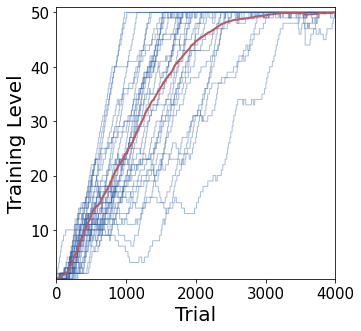

In [210]:
mean_L_curve = mean_learning_curve(data.training_level_by_trial.values)
std = standard_dev_across_trials(data.training_level_by_trial.values)

window = 5
fig,ax = plt.subplots(1, 1, figsize=(5, 5))


for animal in AA_T_levels:
    ax.plot(animal,label = str(animal), color = '#2B5DA6', alpha = 0.4,linewidth = 1)


ax.set_xlim([0, 4000])

ax.set_ylim([1, 51])

ax.plot(convolve_movmean(mean_L_curve,window), '-',color = dark_pink,linewidth = 2)


smooth_std = convolve_movmean(std,window)
upper = np.array(mean_L_curve) + np.array(smooth_std)
lower = np.array(mean_L_curve) - np.array(smooth_std)

# cut off at 50 because of cieling effect 
for index,item in enumerate(upper):
    if item > 50:
        upper[index] = 50.0
        
# ax.fill_between(list(range(0,len(upper))),(lower),(upper),
#     alpha=0.2, edgecolor='None', facecolor=dark_pink,
#     linewidth=1, linestyle='dashdot', antialiased=True)

plt.ylabel('Training Level',size = 20)
plt.xlabel('Trial',size = 20)
ax.tick_params(axis="y", labelsize=15)
ax.tick_params(axis="x", labelsize=15)

# SaveFig('multi_animal_learning curve.svg',r'Z:\projects\Emmett\Documents\writeup\fig1_behaviour_figures\figs\\')

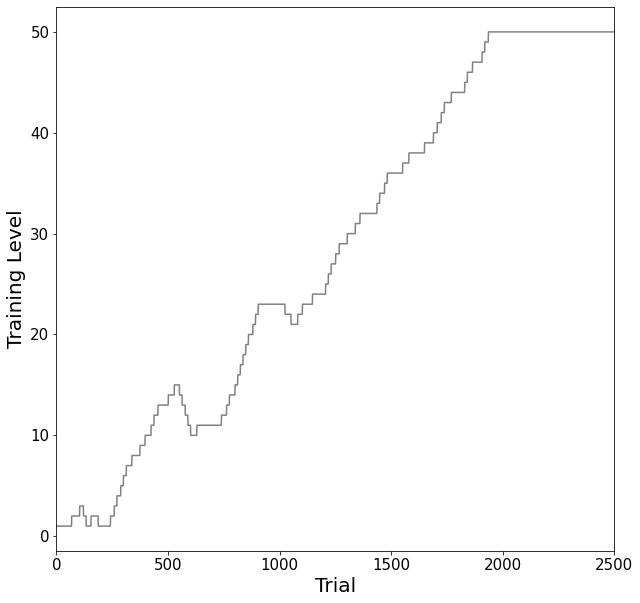

In [211]:
mask = data.animal.values == 'EJT111'
example_data = data.training_level_by_trial[mask].values[0]
fig,ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(example_data,color = 'grey')
ax.set_xlim([0, 2500])
plt.ylabel('Training Level',size = 20)
plt.xlabel('Trial',size = 20)
ax.tick_params(axis="y", labelsize=15)
ax.tick_params(axis="x", labelsize=15)

# SaveFig('example_animal_EJT111_learning curve.svg',r'Z:\projects\Emmett\Documents\writeup\fig1_behaviour_figures\figs\\')

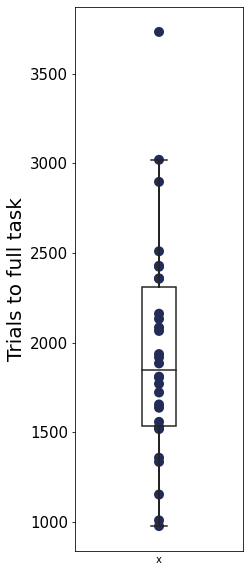

In [212]:
criterion= []
for animal_trials in AA_T_levels:
    criterion = criterion + [np.where(np.array(animal_trials) == 50)[0][0]]

plot_df = pd.DataFrame({'Trials to full task':criterion,'x':np.zeros(len(criterion))})

fig,ax = plt.subplots(1, 1, figsize=(3, 10))

ax=sns.stripplot( y = 'Trials to full task', x = 'x', data = plot_df, color = dark_blue, edgecolor = "white",
                 size = 10, jitter = 0, zorder = 1, orient = 'v',ax = ax)

ax=sns.boxplot( y = 'Trials to full task', x = 'x', data = plot_df, color = dark_blue, width = .2, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
            showfliers=False, whiskerprops = {'linewidth':2, "zorder":10},\
               saturation = 1, orient = 'v',ax = ax)

ax.set_ylabel('Trials to full task',size = 20)
ax.tick_params(axis="y", labelsize=15)
ax.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False) 

# SaveFig('Trials_to_criterion.svg',r'Z:\projects\Emmett\Documents\writeup\fig1_behaviour_figures\figs\\')

Text(0.5, 70.0, 'Start Port')

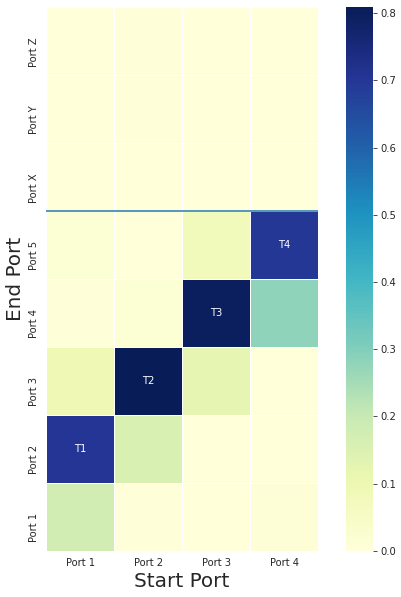

In [213]:
AA_Port_transits = []
for i in range(len(data.animal.values)):
    TimeFiltered_ids,TimeFiltered_times,Reference_times = CreateSequences_Time(data.trials_4000to5000_transitions[0],data.trials_4000to5000_latency[0],data.trials_4000to5000_relativestarttime[0],Transition_filter_time = 2.0)
    Port_transits = determime_heatmapdata(determineTransitionNumber(TimeFiltered_ids),port1,port2,port3,port4)
    AA_Port_transits = AA_Port_transits + [Port_transits]


# find average transition matrix  
    
AA_data= []
for animal in AA_Port_transits:
#     flat_list = [item for sublist in animal for item in sublist]
#     normalised = list(np.array(flat_list) / sum(flat_list))
    flat_list = []
    for s_port in animal:
        normalised = list(np.array(s_port) / sum(s_port))
        flat_list = flat_list + normalised
    
    AA_data = AA_data + [flat_list]
concat_AA_data = conactinate_nth_items(AA_data)

# recreate transition matrix: 
means= [[]]*4
count = 0
index = 0
for item in concat_AA_data:
    means[index] = means[index] + [np.mean(item)]
    count = count + 1
    if count == 8:
        count = 0
        index = index + 1

a = np.array([0,1,2,3,4,5,6,7])
a = np.delete(a, [port1-1,port2-1,port3-1,port4-1,port5-1])
new_order = [port1-1] + [port2-1] + [port3-1] + [port4-1] + [port5-1] + list(a)

mean_Port_transits = reversedata(means)    
x_axis_labels = ['Port 1','Port 2','Port 3','Port 4'] # labels for x-axis
y_axis_labels = ['Port Z','Port Y','Port X','Port 5','Port 4','Port 3','Port 2','Port 1'] # labels for y-axis
labels =  np.array([['','','',''],
                    ['','','',''],
                    ['','','',''],
                    ['','','','T4'],
                    ['','','T3',''],
                    ['','T2','',''],
                    ['T1','','',''],
                    ['','','','']])

mask = np.zeros_like(mean_Port_transits)

#plot:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    h1 = sns.heatmap(mean_Port_transits,xticklabels=x_axis_labels, yticklabels=y_axis_labels, 
                    linewidths=.5, mask=mask, square=True,cmap="YlGnBu",annot = labels,fmt = '',cbar_kws = dict(use_gridspec=False,location="right"))

#add seprrating line:
ax.hlines([3], *ax.get_ylim())
ax.set_ylabel('End Port',size = 20)
ax.set_xlabel('Start Port',size = 20)

#save fig
# SaveFig('TransitionHistogram.svg',r'Z:\projects\Emmett\Documents\writeup\fig1_behaviour_figures\figs\\')

In [214]:

## average poke data multiple animals
## average transition times for multiple animals
## save a copy of this in fig 1 df, move fig 1 df and data to somewhre more appropriate and cleaner


## CLEAN UP 

[None, None, None, None, None, None]

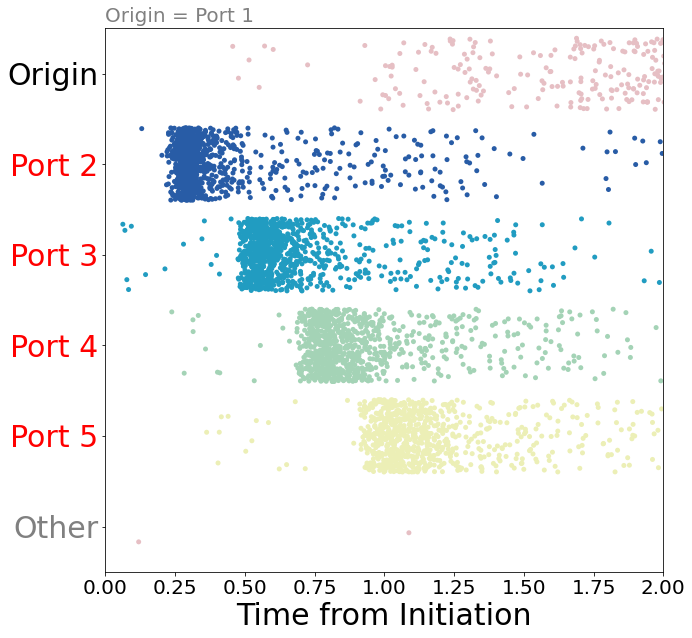

In [215]:
paths = glob.glob(PATH + '\Preprocessed\\')
for item in paths:
    if 'EJT61' in item:
        path = item + os.listdir(item)[-1] + '\PreProcessed_Sequence_df_timefiltered_port1aligned.csv'

example_animal_df2 = pd.read_csv(path)

# matplotlib.style.use('default')

    ## Port1 fitted poke histograms:
# pull in data 
P1Fitted_tfiltered_seqs = list(example_animal_df2.loc[:,'Sequence_ids'])  
P1Fitted_tfiltered_times = list(example_animal_df2.loc[:,'Sequence_times'])    
#fit by port1:
Port1Pokes = port_fitted_poke_times(P1Fitted_tfiltered_seqs,P1Fitted_tfiltered_times,port1,6)

start_port = 0
df =  create_plotting_df(Port1Pokes,new_order)

colors = ['#E6BFC4','#285CA6','#219CC1','#A4D3B6','#ECEFB6','#E6BFC4']

#plots:
dx="index"; dy="Time"; ort="h"; pal = colors; sigma = .2
f, ax = plt.subplots(figsize=(10, 10))
# ax=pt.half_violinplot( x = dx, y = dy, data = df, palette = pal, bw = .2, cut = 0.,
#                       scale = "area", width = .6, inner = None, orient = ort)

ax=sns.stripplot( x = dy, y = dx, data = df, palette = pal, edgecolor = "white",
                 size = 5, jitter = 0.4, zorder = 0, orient = ort)
# ax=sns.boxplot( x = dy, y = dx, data = df, color = "grey", width = .6, zorder = 10,\
#             showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
#             showfliers=False, whiskerprops = {'linewidth':2, "zorder":10},\
#                saturation = 1, orient = ort)

ax.set_xlabel('Time from Initiation',fontsize = 30)
ax.set_ylabel('',fontsize = 30)
ax.tick_params(axis="y", labelsize=20)
ax.tick_params(axis="x", labelsize=20)

ax.set_xlim(0,2)

all_indexes = list(df.loc[:,'index'])
plottedports = []
for x in all_indexes:
    if x not in plottedports:
        plottedports = plottedports + [x]

lst = []
colors = []
for index, portname in enumerate(plottedports):
    if portname == start_port:
        lst = lst + ['Origin']
        colors = colors + ['k']
    elif portname == 5:
        lst = lst + ['Other'] 
        colors = colors + ['grey']
    else:
        lst = lst + ['Port '+ str((portname+1))] 
        colors = colors + ['red']

ax.set_title('Origin = Port ' + str(start_port+1), loc = 'left',fontsize=20, color = 'grey')

ax.set_yticklabels(lst, fontsize = 30)
[t.set_color(i) for (i,t) in
 zip(colors,ax.yaxis.get_ticklabels())]


# SaveFig('ExampleAnimal_EJT61_p1fittedpokes.svg',r'Z:\projects\Emmett\Documents\writeup\fig1_behaviour_figures\figs\\')

(0.0, 2.0)

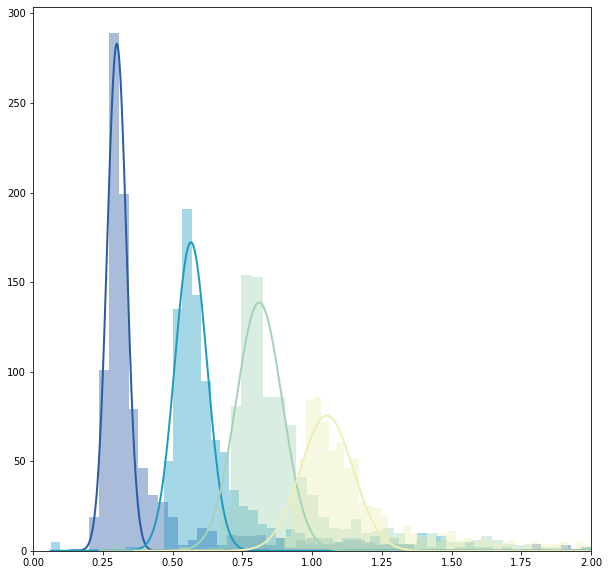

In [216]:
##############################################################################

trial_split_data = dict(tuple(df.groupby('index')))


from scipy.optimize import curve_fit

def gaussian(x, mean, amplitude, standard_deviation):
    return amplitude * np.exp( - (x - mean)**2 / (2*standard_deviation ** 2))

colors = ['#E6BFC4','#285CA6','#219CC1','#A4D3B6','#ECEFB6','#E6BFC4']

f, ax = plt.subplots(figsize=(10, 10))
bins_number=100
for i in trial_split_data:
    if i > 0:
        x = list(trial_split_data[i]['Time'])

        bin_heights, bin_borders, _ = plt.hist(x, bins=bins_number, label='histogram', color = colors[i], alpha = 0.4)
        bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
        try:
            popt, _ = curve_fit(gaussian, bin_centers, bin_heights, p0=[1., 0., 1.])
            x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
            plt.plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt), label='fit', color = colors[i],linewidth = 2)
        except Exception:
            pass

ax.set_xlim(0,2)

#save
# SaveFig('ExampleAnimal_EJT61_p1fittedHistogram.svg',r'Z:\projects\Emmett\Documents\writeup\fig1_behaviour_figures\figs\\')



In [222]:
############### Plot transition times:
plot_df = pd.DataFrame({'Transition':[],'Time':[]})

Transitions = [21,16,63,37]

for animal in range(len(animals)):
    #pull data from dfs:
    Time_filter = np.array(data.trials_4000to5000_2s_timefilter[animal])
    TransitionTypes_unfilt = np.array(data.trials_4000to5000_transitions[animal])
    TransitionLatency_unfilt = np.array(data.trials_4000to5000_latency[animal])

    # filter out transitions that are too slow (defined in preprocessing as 2s)
    TransitionTypes_Tfilt = list(TransitionTypes_unfilt[Time_filter==1])
    TransitionLatency_Tfilt = list(TransitionLatency_unfilt[Time_filter==1])
    
    Transition_Latencies, transition_type = Find_Transition_times_sns(TransitionLatency_Tfilt,TransitionTypes_Tfilt,Transitions)
    if transition_type: #if its not empty
        df = pd.DataFrame({'Transition' : transition_type,'Time':Transition_Latencies})

    means = [np.mean(df.Time[df.Transition.values == 1]),np.mean(df.Time[df.Transition.values == 2]),np.mean(df.Time[df.Transition.values == 3]),np.mean(df.Time[df.Transition.values == 4])]
    t_code = ['T1','T2','T3','T4']
    tempt_df = pd.DataFrame({'Transition':t_code,'Time':means})
    plot_df= plot_df.append(tempt_df)

### 

fig,ax = plt.subplots(1, 1, figsize=(7, 14))

ax=sns.stripplot( y = 'Time', x = 'Transition', data = plot_df, color = '#A5D3B7', edgecolor = "white",
                 size = 13, jitter = 0, zorder = 1, orient = 'v',ax = ax,alpha = 0.5)

ax=sns.boxplot (y = 'Time', x = 'Transition', data = plot_df, color = dark_blue, width = .2, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
            showfliers=False, whiskerprops = {'linewidth':2, "zorder":10},\
               saturation = 1, orient = 'v',ax = ax)

ax.set_ylabel('transition Times',size = 20)
ax.tick_params(axis="y", labelsize=15)
# ax.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False) 


ax.set_xticklabels(['Transition 1','Transition 2','Transition 3','Transition 4' ], fontsize = 20,rotation = 90)

SaveFig('Transition_times.svg',r'Z:\projects\Emmett\Documents\writeup\fig1_behaviour_figures\figs\\')

In [186]:
np.array(data.trials_4000to5000_transitions[animal])[session_mask]

array([21, 16, 63, ..., 16, 63, 37])

In [189]:
data

,animal,training_level_by_trial,trials_per_session,trials_4000to5000_session,trials_4000to5000_trial_id,trials_4000to5000_transitions,trials_4000to5000_latency,trials_4000to5000_2s_timefilter,trials_4000to5000_relativestarttime
0,EJT100,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[48, 29, 37, 31, 36, 80, 36, 42, 201, 64, 123,...","[26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 2...","[99, 99, 99, 99, 99, 99, 100, 100, 100, 100, 1...","[21, 16, 63, 33, 37, 72, 21, 16, 63, 37, 72, 2...","[0.2369000000001051, 0.2993999999998777, 0.276...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1324.572, 1324.8904, 1325.2475, 1325.5631, 13..."
1,EJT101,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[69, 27, 33, 45, 49, 122, 93, 106, 88, 101, 24...","[23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 2...","[203, 203, 203, 203, 203, 204, 204, 204, 204, ...","[21, 16, 63, 37, 77, 72, 21, 16, 63, 37, 72, 2...","[0.4076999999997497, 0.3180999999999585, 0.471...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2197.9862000000003, 2198.4045, 2198.8136, 219..."
2,EJT110,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[35, 39, 36, 43, 226, 115, 178, 558, 349, 188,...","[17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 1...","[300, 300, 300, 300, 300, 300, 300, 301, 301, ...","[22, 21, 16, 63, 37, 77, 72, 22, 21, 16, 63, 3...","[0.9704999999999018, 0.31899999999996, 0.26530...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2547.8913, 2548.8877, 2549.3047, 2549.6237, 2..."
3,EJT111,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[69, 70, 53, 39, 247, 87, 153, 314, 419, 366, ...","[15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 1...","[145, 145, 145, 145, 145, 145, 145, 146, 146, ...","[21, 16, 63, 33, 33, 37, 72, 22, 21, 12, 26, 6...","[0.1879000000000132, 0.1838000000000192, 0.202...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, ...","[762.5943, 762.8543, 763.1052, 763.3484, 763.4..."
4,EJT112,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[48, 56, 58, 55, 167, 93, 162, 354, 402, 451, ...","[15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, ...","[22, 21, 15, 52, 26, 66, 63, 37, 76, 63, 32, 2...","[0.1172000000000021, 0.2785000000000011, 2.798...","[1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, ...","[12.6284, 12.789, 13.0927, 15.9386, 16.7275, 1..."
5,EJT133,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[60, 63, 224, 103, 103, 401, 545, 752, 336, 43...","[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 1...","[169, 169, 169, 169, 169, 169, 169, 169, 170, ...","[21, 11, 16, 66, 66, 63, 37, 72, 21, 16, 67, 7...","[0.2542000000000826, 0.0786000000000513, 0.255...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1232.6445, 1232.9362, 1233.0897, 1233.3829, 1..."
6,EJT153,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[60, 136, 175, 204, 339, 566, 524, 585, 635, 5...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...","[244, 244, 244, 244, 244, 244, 244, 245, 245, ...","[22, 21, 16, 63, 33, 37, 72, 21, 16, 63, 37, 7...","[0.0097000000000662, 0.2128000000000156, 0.237...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1191.3546, 1191.39, 1191.6881, 1191.9811, 119..."
7,EJT154,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[59, 89, 183, 114, 155, 316, 258, 207, 480, 44...","[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 1...","[337, 337, 337, 337, 337, 337, 337, 338, 338, ...","[21, 16, 67, 77, 73, 37, 72, 22, 22, 21, 16, 6...","[0.2255999999997584, 0.2219000000000051, 0.647...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3396.4527, 3396.7068, 3397.0055, 3397.7109, 3..."
8,EJT155,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[53, 99, 161, 86, 125, 186, 281, 385, 326, 332...","[14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 1...","[380, 380, 380, 380, 380, 381, 381, 381, 381, ...","[21, 16, 63, 37, 72, 21, 16, 63, 37, 72, 22, 2...","[0.4554999999995743, 0.2817999999997482, 0.247...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."

mean ratios per port: [0.17785810687044723, 0.19353426850455144, 0.23080826928842546, 0.002645173419646422, 0.0025047640010721147, 0.18485735727661476, 0.20535676109542422, 0.00243529954381828]
SEM per port: [0.004073563470960156, 0.004483576911517471, 0.006406195726605244, 0.00031652239525241583, 0.00032878449338558964, 0.007237622924285281, 0.006296748700069586, 0.0002852634750142664]


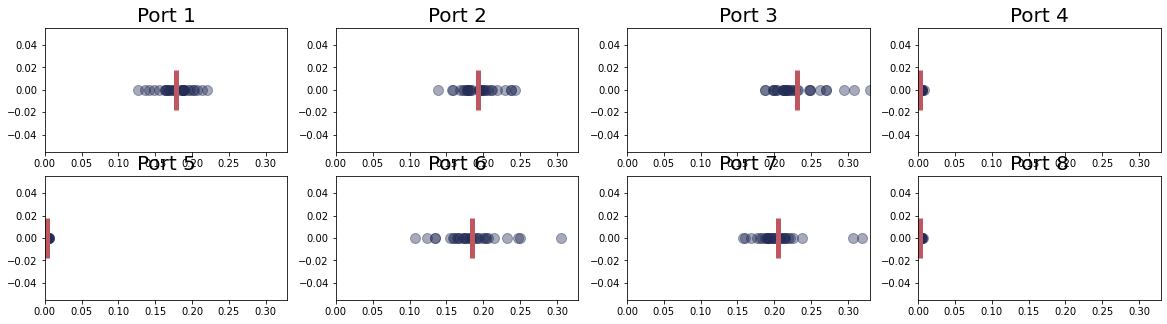

In [235]:
## for each session pull out all the first ports that was entered, for the last transiton also take the second one as it wont appear in a subsequent transition
AA_port_proportions= []

for animal in range(len(data.animal.values)):
    ports= []
    for session in np.unique(data.trials_4000to5000_session[animal]):
        session_mask = np.array(data.trials_4000to5000_session[animal]) == session
        for index, transit in enumerate(np.array(data.trials_4000to5000_transitions[animal])[session_mask]):
            ports = ports + [int(str(transit)[0])]
            if index == len(np.array(data.trials_4000to5000_transitions[animal])[session_mask])-1:
                ports = ports + [int(str(transit)[-1])]

    port_proportions=[data.animal.values[animal]]
    for i in range(1,9):
        port_proportions = port_proportions + [sum(np.array(ports) == i)/len(ports)]

    AA_port_proportions = AA_port_proportions + [port_proportions]

poke_proportions_df = pd.DataFrame(AA_port_proportions, columns = ['animal','p1','p2','p3','p4','p5','p6','p7','p8'])


fig,ax = plt.subplots(1, 1, figsize=(5, 5))
ax.set_ylim([0, 5])
ax.set_xlim([0, 5])

colormap = plt.cm.get_cmap('YlGnBu') # 'plasma' or 'viridis'


color_vals = [np.mean(poke_proportions_df.p1),np.mean(poke_proportions_df.p2),np.mean(poke_proportions_df.p3),np.mean(poke_proportions_df.p4),
              np.mean(poke_proportions_df.p5),np.mean(poke_proportions_df.p6),np.mean(poke_proportions_df.p7),np.mean(poke_proportions_df.p8)]

normalised_colour = np.array(color_vals)/max(color_vals)

x = [1,2,3,4,1,2,3,4]
y = [2,2,2,2,3.2,3.2,3.2,3.2]

circles_ = []
for i in range(8):
    color_ = colormap(normalised_colour[i])
    circles_ = circles_ + [plt.Circle((x[i], y[i]), 0.4,fill=True, linewidth=5, color = color_)]
for i in range(8):
    ax.add_artist(circles_[i])

plt.axis('off')
plt.text(0.7,1,('Port_Poke_proportions for Session '), horizontalalignment='left', size=20)





# sc = plt.scatter(x, y, c=colors)

sm = plt.cm.ScalarMappable(cmap=colormap)
sm.set_clim(vmin=0, vmax=max(color_vals))
plt.text(5,1,('max val is '+ str(max(color_vals))),size=10)

plt.colorbar(sm,fraction=0.02, pad=0.04)


poke_data = [poke_proportions_df.p1.values,poke_proportions_df.p2.values,poke_proportions_df.p3.values,poke_proportions_df.p4.values,
              poke_proportions_df.p5.values,poke_proportions_df.p6.values,poke_proportions_df.p7.values,poke_proportions_df.p8.values]


SaveFig('PokeProportions.svg',r'Z:\projects\Emmett\Documents\writeup\fig1_behaviour_figures\figs\\')

nrow = 2 
ncol = 4
fig, axs = plt.subplots(nrow, ncol,figsize=(20, 5))

for ind, ax in enumerate(fig.axes):

    ax.plot(poke_data[ind],np.zeros(len(animals)),'o',alpha = 0.4, color = dark_blue,markersize = 10)
    ax.plot(color_vals[ind],0,'|',color = dark_pink,markersize = 40, markeredgewidth = 5)
    ax.set_xlim([0, np.max(poke_data)])
    
    ax.set_title('Port ' + str(ind + 1), size=20)
    
print('mean ratios per port: ' + str(color_vals))
print('SEM per port: ' + str(SEM))




In [237]:
print('mean ratios per port: ' + str(np.array(color_vals)*100))
print('SEM per port: ' + str(np.array(SEM)*100))

mean ratios per port: [17.78581069 19.35342685 23.08082693  0.26451734  0.2504764  18.48573573
 20.53567611  0.24352995]
SEM per port: [0.40735635 0.44835769 0.64061957 0.03165224 0.03287845 0.72376229
 0.62967487 0.02852635]


In [230]:
 color_vals = [np.mean(poke_proportions_df.p1),np.mean(poke_proportions_df.p2),np.mean(poke_proportions_df.p3),np.mean(poke_proportions_df.p4),
              np.mean(poke_proportions_df.p5),np.mean(poke_proportions_df.p6),np.mean(poke_proportions_df.p7),np.mean(poke_proportions_df.p8)]
    
    
SEM = [scipy.stats.sem(poke_proportions_df.p1),scipy.stats.sem(poke_proportions_df.p2),scipy.stats.sem(poke_proportions_df.p3),scipy.stats.sem(poke_proportions_df.p4),
              scipy.stats.sem(poke_proportions_df.p5),scipy.stats.sem(poke_proportions_df.p6),scipy.stats.sem(poke_proportions_df.p7),scipy.stats.sem(poke_proportions_df.p8)]

In [231]:
SEM

[0.004073563470960156,
 0.004483576911517471,
 0.006406195726605244,
 0.00031652239525241583,
 0.00032878449338558964,
 0.007237622924285281,
 0.006296748700069586,
 0.0002852634750142664]